In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy.stats as spicystats
import sys
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, roc_curve
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from pandas.plotting import scatter_matrix
from statsmodels.stats.proportion import proportions_ztest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import f1_score, log_loss
from tabulate import tabulate


sys.path.insert(0, '../src')
sys.path.insert(0, '../data')

import chess

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of chess failed: Traceback (most recent call last):
  File "c:\Users\muscl\anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "c:\Users\muscl\anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 394, in superreload
    module = reload(module)
  File "c:\Users\muscl\anaconda3\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "c:\Users\muscl\anaconda3\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 850, in exec_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "c:\Coding\daimil10\projects\Final Project\chess_games\notebooks\../src\chess.py", line 270, in <module>
    white_ttest_rating_diff, white_ttest_opening_play, white_ttest_num_turns, black_ttest_rating_diff, bl

In [30]:
# Read in chess dataset and sample it. Drop columns containing immaterial data.
chess_games = pd.read_csv("../data/games.csv")
chess_games.drop(['rated', 'id', 'created_at', 'last_move_at', 'increment_code', 'white_id', 'black_id', 'opening_eco'], axis=1, inplace=True)
chess_games.sample(10) 

,turns,victory_status,winner,white_rating,black_rating,moves,opening_name,opening_ply
372,37,resign,black,974,1129,d4 d5 Nc3 e6 Bd2 Bb4 a3 Bxc3 bxc3 Nf6 e3 Bd7 c...,Queen's Pawn Game: Chigorin Variation,3
15667,12,resign,black,1758,1815,e4 e5 Nf3 Nc6 Bc4 Nd4 Nxe5 Qg5 Ng4 d5 c3 Bxg4,Italian Game: Schilling-Kostic Gambit,6
17816,7,resign,white,1500,1213,e4 e5 Qh5 g6 Qxe5+ Be7 Qxh8,King's Pawn Game: Wayward Queen Attack,3
14658,64,resign,black,2619,1927,d4 Nf6 c4 e6 Nf3 d5 Nc3 Bb4 Bg5 Nbd7 e3 c5 cxd...,Queen's Gambit Declined: Westphalian Variation,12
13988,47,resign,black,1364,1351,e4 e5 Nf3 d6 Nc3 Bg4 d4 f6 dxe5 fxe5 Qd5 c6 Qd...,Philidor Defense #2,4
10304,55,mate,white,1648,1630,e4 e5 Qh5 Nc6 c3 g6 Qf3 Nf6 d3 Bg7 Bg5 O-O Bxf...,King's Pawn Game: Wayward Queen Attack,3
12615,104,resign,black,1715,2621,e4 c5 Nf3 d6 d4 Nf6 e5 dxe5 Nxe5 Qxd4 Qxd4 cxd...,Sicilian Defense: Modern Variations | Anti-Qx...,6
6938,24,resign,black,1303,1705,e4 e5 Nf3 Nc6 d4 exd4 Nxd4 Bb4+ Bd2 Bxd2+ Qxd2...,Scotch Game: Malaniuk Variation,8
159,76,resign,black,1861,1844,e4 e5 Nf3 Nc6 Bc4 h6 c3 Nf6 O-O Bc5 d4 exd4 cx...,Italian Game: Anti-Fried Liver Defense,6
14976,24,resign,black,1561,1740,e4 e5 Nf3 Nc6 Bc4 Nf6 Ng5 d5 exd5 Na5 Bb5+ c6 ...,Italian Game: Two Knights Defense | Polerio D...,11


In [31]:
# Grab and count the chess victory status, broken down by category. 

def chess_victories(chess_df):
     victory_status = chess_df['victory_status'].value_counts().values
     return victory_status
chess_victories(chess_games)

array([11147,  6325,  1680,   906], dtype=int64)

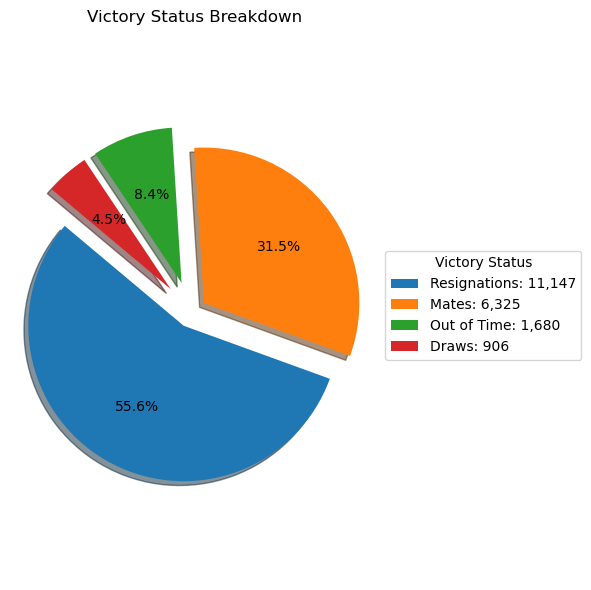

In [32]:
# Make pie chart to depict the victory status categories.
def victory_status_pie_chart(victory_status, path='../images/chess_outcomes_breakdown.png'):
     
     fig, ax = plt.subplots(figsize = (6,6))

     sizes = victory_status
     
     labels = ['Resignations: 11,147', 'Mates: 6,325', 'Out of Time: 1,680', 'Draws: 906']
     
     explode = (0.1, 0.1, 0.2, 0.2)
     
     c = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
     
     plt.pie(sizes, explode=explode, colors=c, 
        autopct='%1.1f%%', shadow=True, startangle=140)
     
     ax.legend( labels, title="Victory Status",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

     ax.set_title("Victory Status Breakdown")
     
     plt.tight_layout()
     
     plt.axis('equal')
    
     plt.savefig(path)

victory_status_pie_chart(chess_victories(chess_games))

In [33]:
# Look at games won, by mate, out of time, and resignation, and compare to draws. 

def wins_versus_draws(chess_df):
    
    game_status = chess_df['victory_status'].value_counts('draw')
    
    game_status_percent = game_status * 100
    
    victories_percent = str(sum(game_status_percent.iloc[:3]))
    
    draws_percent = str(sum(game_status_percent.iloc[-1:]))

    return victories_percent, draws_percent



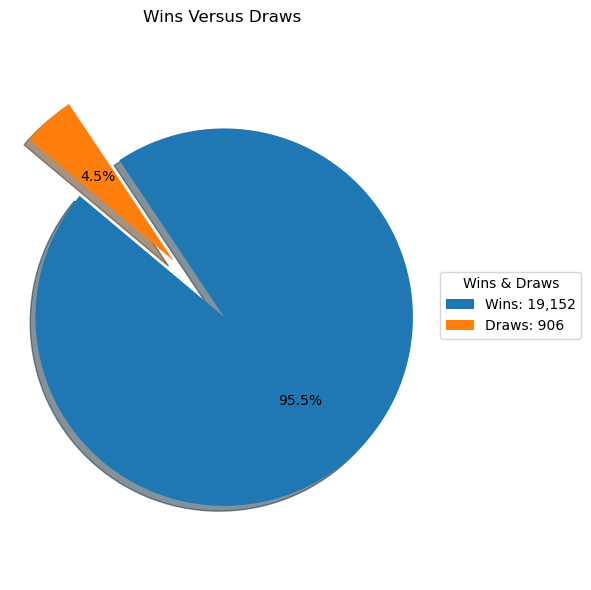

In [34]:
def wins_versus_draws_pie_chart(wins_and_draws, path='../images/wins_versus_draws.png'):
    
    fig, ax = plt.subplots(figsize = (6,6))

    sizes = wins_and_draws
    
    labels = ['Wins: 19,152', 'Draws: 906']
    
    explode = (0.2, 0.2)
    
    c = ['#1f77b4', '#ff7f0e']
    
    plt.pie(sizes, explode=explode, colors=c, 
        autopct='%1.1f%%', shadow=True, startangle=140)
    
    ax.legend(labels, title="Wins & Draws",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
    
    ax.set_title("Wins Versus Draws")
    
    plt.tight_layout()
    
    plt.axis('equal')
    
    plt.savefig(path)

wins_versus_draws_pie_chart(wins_versus_draws(chess_games))

In [35]:
# Null Hypothesis 1: The average rating differential between black and white has no significance on which player wins the game.
# Alternative Hypothesis 1: The average rating differential between black and white has a significance on which player wins the game.

In [36]:
# Null Hypothesis 2: The average number of consecutive moves where a player follows an optimal book opening has no significance on which player wins the game.
# Alternative Hypothesis 2: The average number of consecutive moves where a player follows an optimal book opening has a significance on which player wins the game.

In [37]:
# Null Hypothesis 3: The average number of turns in a game has no significance on which player wins the game.
# Alternative Hypothesis 3: The average number of turns in a game has significance on which player wins the game.

In [38]:
# Look at stronger white players, greater than 100 ELO difference, and map wins to 1 and draws or losses to 0.
# Perform two-sample independent t-tests to analyze the p-value and ultimately the null & alternative hypotheses for white rating differentials, 
# number of consecutive moves where a player follows an optimal book, and number of turns in the game. Generate table of results.
# Histogram plot displaying white wins versus white draws and losses when white is the superior opponent.

def chess_differentials_white(chess_df):

    chess_df = chess_df.copy()

    chess_df['Rating Differential White'] = (chess_df['white_rating'] - chess_df['black_rating']).astype(int)

    white_greater_100 = chess_df[(chess_df['Rating Differential White'] > 100)]

    def victory_status(s):
        if s == 'black' or s == 'draw' :
            return 0

        else:
            return 1

    white_greater_100['winner'] = white_greater_100['winner'].apply(victory_status).astype(int)

    return white_greater_100

chess_outcomes_white = chess_differentials_white(chess_games)

# The p-value for average rating differential and average opening play is less than 0.05, so we reject all the null hypotheses and there is significant difference, or impact, 
# between the white rating differentials and the number of turns in the game, all in relation to white winning the game.
# The p-value for average number of consecutive moves where white follows an optimal book opening is greater than 0.05, so we can accept the null hypothesis 
# and state that there is no significance in following an average amount of consecutive moves of an optimal book opening and white winning the game.
# Additionally, the relatively high t-statistic of approximately 11.55 and -7.47 for rating differentials and number of turns simply indicates the confidence in the predictor coefficient, 
# since they're both far greater than 1 standard deviation away, or an absolute value of 1.96, for an alpha value of 0.05, and further supports the decision to reject the null hypothesis.  
# The low t-statistic of -0.31 for opening play shows a lack of confidence in the predictor coefficient and further supports the decision to accept the null hypothesis since it's 
# less than 1 standard deviation away, or an absolute value of 1.96, for an alpha value of 0.05.
# The positive t-statistic indicates that the sample mean for rating differentials greater than or equal to the average have a large sample size 
# than the sample mean for rating differentials less than the average.
# The negative t-statistic indicates that the sample means for opening plays and number of turns greater than or equal to the average have a smaller sample size
# than the sample means for opening plays and number of turns less than the average.
# The fact that white moves first might overcome the necessity to follow an optimal book opening for a consecutive amount of moves in order to win.
# When only considering wins and draws plus losses of a higher-ranked white opponent, white wins 72.54% of the time and draws or loses 27.46% of the time over 5,666 games.

C:\Users\muscl\AppData\Local\Temp\ipykernel_32420\3038375317.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  white_greater_100['winner'] = white_greater_100['winner'].apply(victory_status).astype(int)


In [39]:
def chess_differentials_black(chess_df):
    
    chess_df = chess_df.copy()
    
    chess_df['Rating Differential Black'] = (chess_df['black_rating'] - chess_df['white_rating']).astype(int)
    
    black_greater_100 = chess_df[(chess_df['Rating Differential Black'] > 100)]

    def victory_status(s):
        if s == 'white' or s == 'draw' :
            return 0

        else:
            return 1
    
    black_greater_100['winner'] = black_greater_100['winner'].apply(victory_status).astype(int)

    return black_greater_100

chess_outcomes_black = chess_differentials_black(chess_games)

C:\Users\muscl\AppData\Local\Temp\ipykernel_32420\1434447752.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  black_greater_100['winner'] = black_greater_100['winner'].apply(victory_status).astype(int)


In [50]:
def t_tests(white_greater, black_greater):  
    
    white_average_rating_diff = np.mean(white_greater['Rating Differential White'])

    greater_avg_rating_diff = white_greater['winner'][white_greater['Rating Differential White']>= white_average_rating_diff]

    less_avg_rating_diff = white_greater['winner'][white_greater['Rating Differential White']< white_average_rating_diff]

    white_ttest_rating_diff = spicystats.ttest_ind(greater_avg_rating_diff, less_avg_rating_diff, equal_var=False)

    
    white_average_plays = np.mean(white_greater['opening_ply'])

    greater_avg_plys = white_greater['winner'][white_greater['opening_ply']>= white_average_plays]
    
    less_avg_plys = white_greater['winner'][white_greater['opening_ply']< white_average_plays]
    
    white_ttest_opening_play = spicystats.ttest_ind(greater_avg_plys, less_avg_plys, equal_var=False)
    

    white_average_turns = np.mean(white_greater['turns'])

    greater_avg_turns = white_greater['winner'][white_greater['turns']>= white_average_turns]

    less_avg_turns = white_greater['winner'][white_greater['turns']< white_average_turns]

    white_ttest_num_turns = spicystats.ttest_ind(greater_avg_turns, less_avg_turns, equal_var = False)


    black_average_rating_diff = np.mean(black_greater['Rating Differential Black'])

    greater_avg_rating_diff = black_greater['winner'][black_greater['Rating Differential Black']>= black_average_rating_diff]

    less_avg_rating_diff = black_greater['winner'][black_greater['Rating Differential Black']< black_average_rating_diff]

    black_ttest_rating_diff = spicystats.ttest_ind(greater_avg_rating_diff, less_avg_rating_diff, equal_var=False)

    
    black_average_plays = np.mean(black_greater['opening_ply'])

    greater_avg_plys = black_greater['winner'][black_greater['opening_ply']>= black_average_plays]
    
    less_avg_plys = black_greater['winner'][black_greater['opening_ply']< black_average_plays]
    
    black_ttest_opening_play = spicystats.ttest_ind(greater_avg_plys, less_avg_plys, equal_var=False)
    

    black_average_turns = np.mean(black_greater['turns'])

    greater_avg_turns = black_greater['winner'][black_greater['turns']>= black_average_turns]

    less_avg_turns = black_greater['winner'][black_greater['turns']< black_average_turns]

    black_ttest_num_turns = spicystats.ttest_ind(greater_avg_turns, less_avg_turns, equal_var = False)

    return white_ttest_rating_diff, white_ttest_opening_play, white_ttest_num_turns, black_ttest_rating_diff, black_ttest_opening_play, black_ttest_num_turns
white_ttest_rating_diff, white_ttest_opening_play, white_ttest_num_turns, black_ttest_rating_diff, black_ttest_opening_play, black_ttest_num_turns = t_tests(chess_differentials_white(chess_games), chess_differentials_black(chess_games))



In [1]:
def t_tests_tables(chess_df, path1='../images/white_wins_vs_draws_&_losses.png', path2='../images/black_t_tests.png'):
    
    tests = [white_ttest_rating_diff, white_ttest_opening_play, white_ttest_num_turns]

    rows = ['White t-test: Average Rating Differential', 'White t-test: Average Opening Play', 'White t-test: Average # Turns']

    columns = ['t-statistic', 'p-value']
    
    
    fig, ax = plt.subplots()

    ax.set_axis_off()

    ax.set_title('White t-tests Breakdown')
    
    table = ax.table(
    cellText = tests, 
    rowLabels = rows, 
    colLabels = columns,
    rowColours =["palegreen"] * 10, 
    colColours =["palegreen"] * 10,
    cellLoc ='center', 
    loc ='upper left')

    fig.tight_layout()

    plt.savefig(path1)

    plt.show()

    plt.clf()

    tests = [black_ttest_rating_diff, black_ttest_opening_play, black_ttest_num_turns]

    rows = ['Black t-test: Average Rating Differential', 'Black t-test: Average Opening Play', 'Black t-test: Average # Turns']

    columns = ['t-statistic', 'p-value']
    
    fig, ax = plt.subplots()

    ax.set_axis_off()

    ax.set_title('Black t-tests Breakdown')

    table = ax.table(
    cellText = tests, 
    rowLabels = rows, 
    colLabels = columns,
    rowColours =["palegreen"] * 10, 
    colColours =["palegreen"] * 10,
    cellLoc ='center', 
    loc ='upper left')

    fig.tight_layout()
    
    plt.savefig(path2)
    plt.show()

t_tests_tables(chess_games)
    

NameError: name 'chess_games' is not defined

C:\Users\muscl\AppData\Local\Temp\ipykernel_32420\3038375317.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  white_greater_100['winner'] = white_greater_100['winner'].apply(victory_status).astype(int)
C:\Users\muscl\AppData\Local\Temp\ipykernel_32420\1434447752.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  black_greater_100['winner'] = black_greater_100['winner'].apply(victory_status).astype(int)
C:\Users\muscl\AppData\Local\Temp\ipykernel_32420\248534076.py:39: UserWarning: FixedFormatter shoul

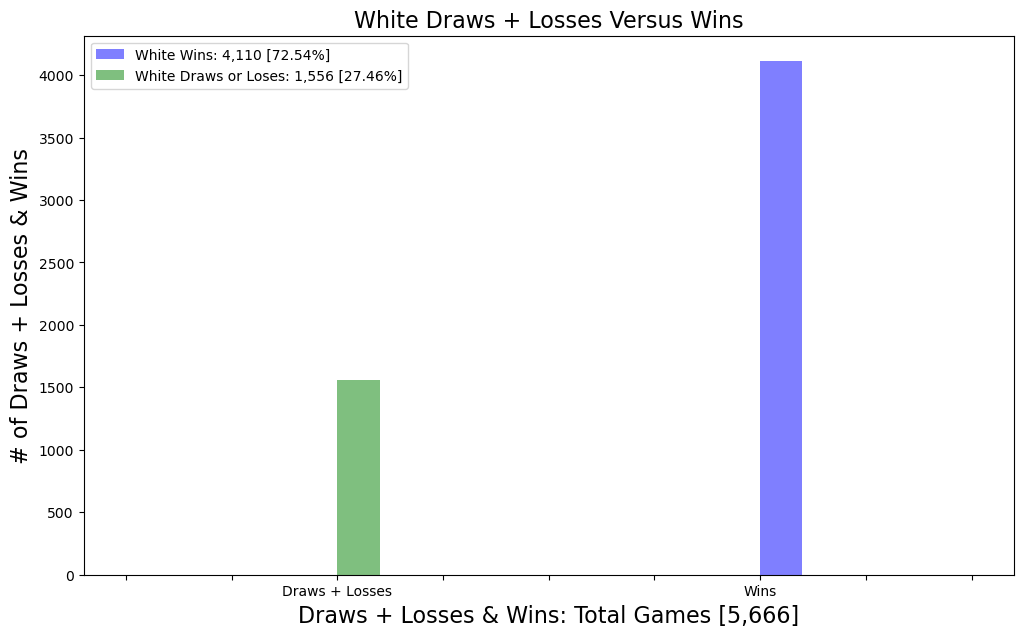

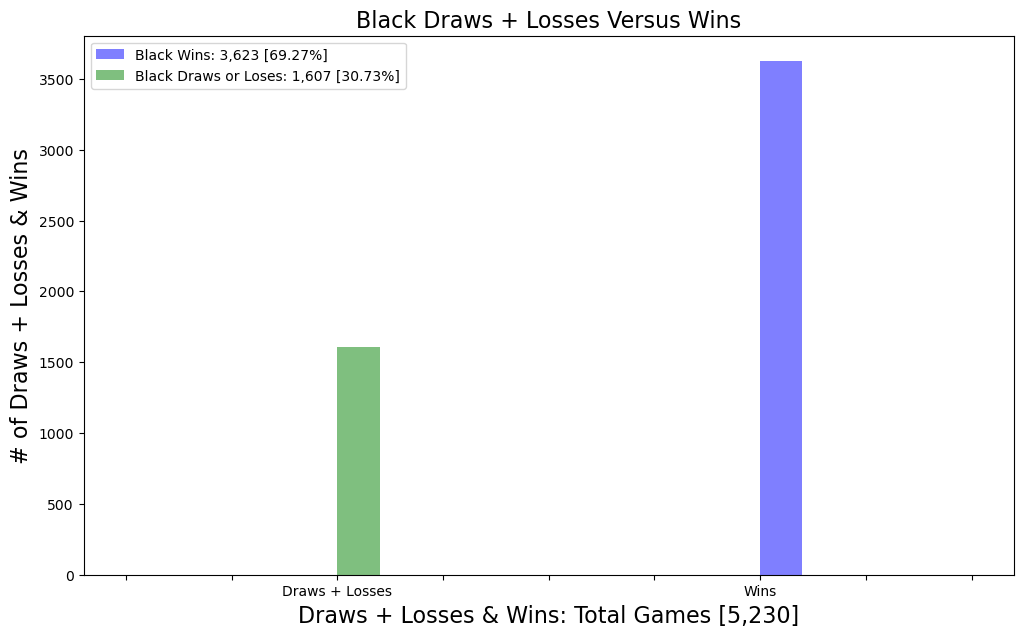

In [42]:
def wins_vs_losses_and_draws_plots(white_greater_100, black_greater_100, path1='../images/white_wins_vs_draws_&_losses.png', path2='../images/black_wins_vs_draws_&_losses.png'):

    white_victory = white_greater_100[white_greater_100['winner'] == 1]

    counted_white_victories = white_victory['winner'].value_counts()

    white_draw_or_loss = white_greater_100[white_greater_100['winner'] == 0]

    white_draw_or_loss_count = white_draw_or_loss['winner'].value_counts()

    white_win_percentage = (counted_white_victories.values /(counted_white_victories.values + white_draw_or_loss_count.values))*100

    white_draw_or_loss_percentage = (white_draw_or_loss_count.values /(counted_white_victories.values + white_draw_or_loss_count.values))*100
    
    fig,ax = plt.subplots()

    ax.hist(white_victory['winner'], color = 'b', alpha = 0.5, label = 'White Wins: 4,110 [72.54%]')

    ax.hist(white_draw_or_loss['winner'], color = 'g', alpha = 0.5, label = 'White Draws or Loses: 1,556 [27.46%]')

    ax.set_title('White Draws + Losses Versus Wins', fontsize = 16)

    ax.set_ylabel('# of Draws + Losses & Wins', fontsize = 16)

    fig.canvas.draw()

    labels = [item.get_text() for item in ax.get_xticklabels()]

    labels[1] = ''
    labels[2] = ''
    labels[4] = ''
    labels[5] = ''
    labels[6] = ''
    labels[8] = ''
    labels[9] = ''
    labels[3] = 'Draws + Losses'
    labels[7] = 'Wins'

    ax.set_xticklabels(labels)

    ax.set_xlabel('Draws + Losses & Wins: Total Games [5,666]', fontsize = 16)

    ax.legend(fontsize = 10)

    plt.savefig(path1)

    fig,ax = plt.subplots()
    
    black_victory = black_greater_100[black_greater_100['winner'] == 1]

    counted_black_victories = black_victory['winner'].value_counts()

    black_draw_or_loss = black_greater_100[black_greater_100['winner'] == 0]

    black_draw_or_loss_count = black_draw_or_loss['winner'].value_counts()

    black_win_percentage = (counted_black_victories.values /(counted_black_victories.values + black_draw_or_loss_count.values))*100
    
    black_draw_or_loss_percentage = (black_draw_or_loss_count.values /(counted_black_victories.values + black_draw_or_loss_count.values))*100
    
    ax.hist(black_victory['winner'], color = 'b', alpha = 0.5, label = 'Black Wins: 3,623 [69.27%]')

    ax.hist(black_draw_or_loss['winner'], color = 'g', alpha = 0.5, label = 'Black Draws or Loses: 1,607 [30.73%]')

    ax.set_title('Black Draws + Losses Versus Wins', fontsize = 16)

    ax.set_ylabel('# of Draws + Losses & Wins', fontsize = 16)

    fig.canvas.draw()

    labels = [item.get_text() for item in ax.get_xticklabels()]
    
    labels[1] = ''
    labels[2] = ''
    labels[4] = ''
    labels[5] = ''
    labels[6] = ''
    labels[8] = ''
    labels[9] = ''
    labels[3] = 'Draws + Losses'
    labels[7] = 'Wins'

    ax.set_xticklabels(labels)

    ax.set_xlabel('Draws + Losses & Wins: Total Games [5,230]', fontsize = 16)

    ax.legend(fontsize = 10)
    
    plt.savefig(path2)

wins_vs_losses_and_draws_plots(chess_differentials_white(chess_games), chess_differentials_black(chess_games))
   
   
    

In [43]:
def chess_correlations(white, black):

    white = white.copy()

    black = black.copy()

    white_correlation_spearman = white['Rating Differential White'].corr(white['winner'], method ='spearman')

    black_correlation_spearman = black['Rating Differential Black'].corr(black['winner'], method ='spearman')

    white_correlation_pearson = white['Rating Differential White'].corr(white['winner'], method ='pearson')

    black_correlation_pearson = black['Rating Differential Black'].corr(black['winner'], method ='pearson')

    return white_correlation_pearson, black_correlation_pearson, white_correlation_spearman, black_correlation_spearman

white_correlation_pearson, black_correlation_pearson, white_correlation_spearman, black_correlation_spearman = chess_correlations(chess_differentials_white(chess_games), chess_differentials_black(chess_games))


C:\Users\muscl\AppData\Local\Temp\ipykernel_32420\3038375317.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  white_greater_100['winner'] = white_greater_100['winner'].apply(victory_status).astype(int)
C:\Users\muscl\AppData\Local\Temp\ipykernel_32420\1434447752.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  black_greater_100['winner'] = black_greater_100['winner'].apply(victory_status).astype(int)


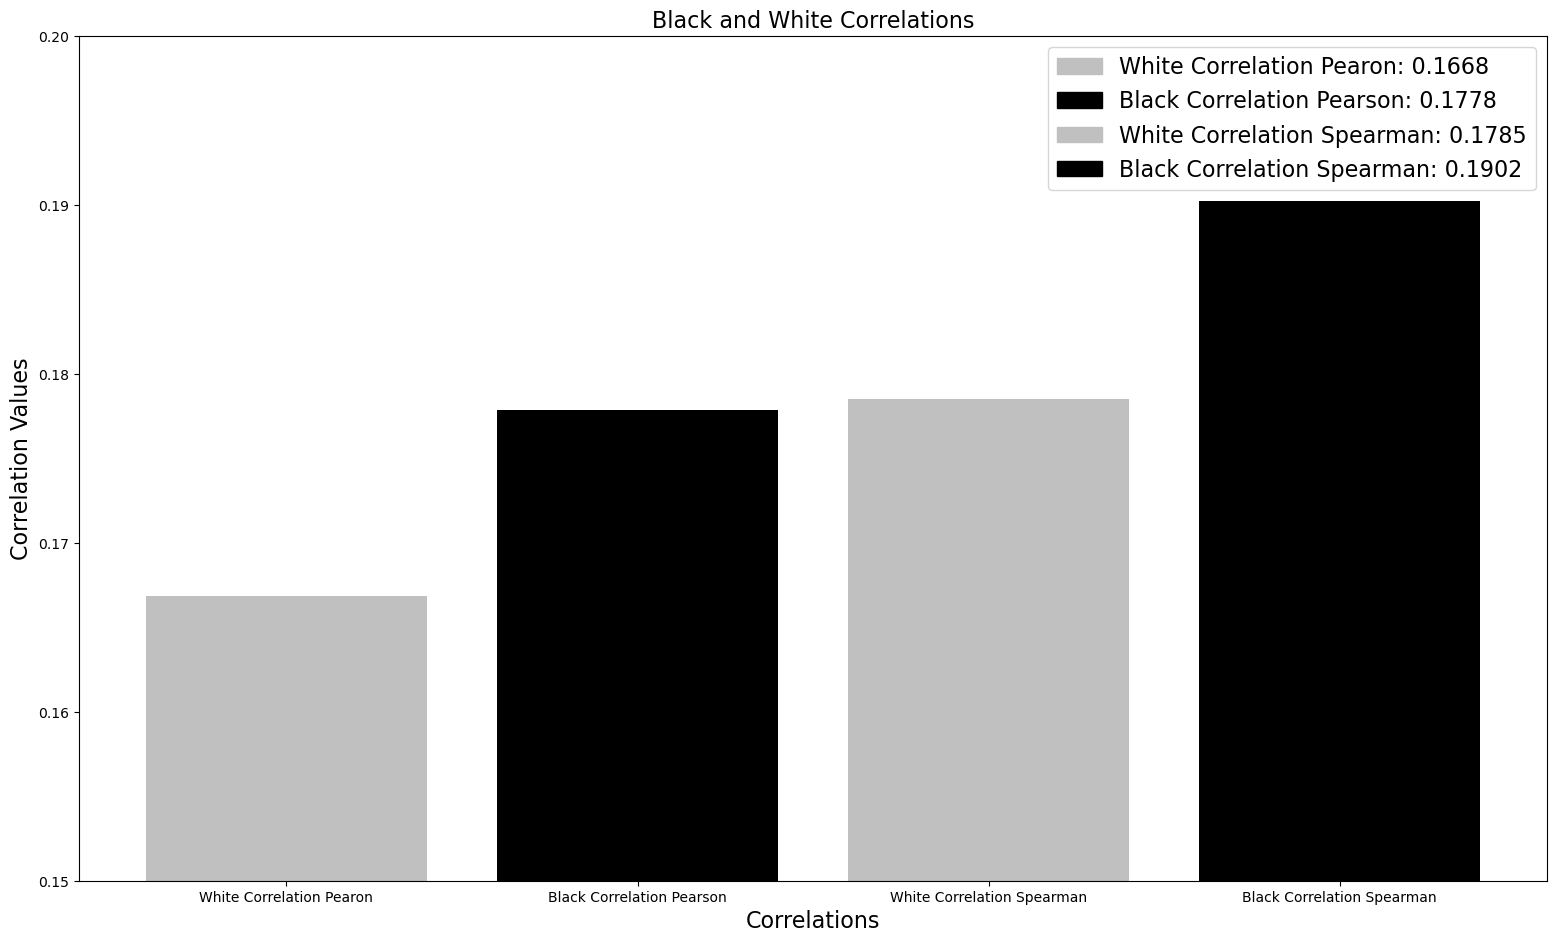

In [44]:
def correlations_plot(chess_df, path="../images/correlations.png"):
    fig,ax = plt.subplots()

    x_axis = [white_correlation_pearson, black_correlation_pearson, white_correlation_spearman, black_correlation_spearman]
    
    x_axis_names = ['White Correlation Pearon', 'Black Correlation Pearson', 'White Correlation Spearman', 'Black Correlation Spearman']

    c = ['silver', 'black', 'silver', 'black']
    
    ax.set_ylim(0.15, 0.20)

    plt.bar(x_axis_names, x_axis, color=c)

    ax.set_title('Black and White Correlations', fontsize = 16)

    ax.set_ylabel('Correlation Values', fontsize = 16)

    ax.set_xlabel('Correlations', fontsize = 16)

    plt.tight_layout()

    fig.set_size_inches(16, 10)

    plt.savefig(path)

    white_pearson_legend = mpatches.Patch(color= 'silver', label='White Correlation Pearon: 0.1668')

    black_pearson_legend = mpatches.Patch(color= 'black', label='Black Correlation Pearson: 0.1778')

    white_spearman_legend = mpatches.Patch(color= 'silver', label='White Correlation Spearman: 0.1785')

    black_spearman_legend = mpatches.Patch(color= 'black', label='Black Correlation Spearman: 0.1902')

    plt.legend(handles=[white_pearson_legend, black_pearson_legend, white_spearman_legend, black_spearman_legend], fontsize = 16)

correlations_plot(chess_games)

C:\Users\muscl\AppData\Local\Temp\ipykernel_32420\180656092.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  white_greater_100['winner'] = white_greater_100['winner'].apply(


Optimization terminated successfully.
         Current function value: 0.570560
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 winner   No. Observations:                 4532
Model:                          Logit   Df Residuals:                     4529
Method:                           MLE   Df Model:                            2
Date:                Thu, 09 Feb 2023   Pseudo R-squ.:                 0.02948
Time:                        06:47:28   Log-Likelihood:                -2585.8
converged:                       True   LL-Null:                       -2664.3
Covariance Type:            nonrobust   LLR p-value:                 7.765e-35
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
turns                        -0.0037      0.001     -4.453      0.000      -0.

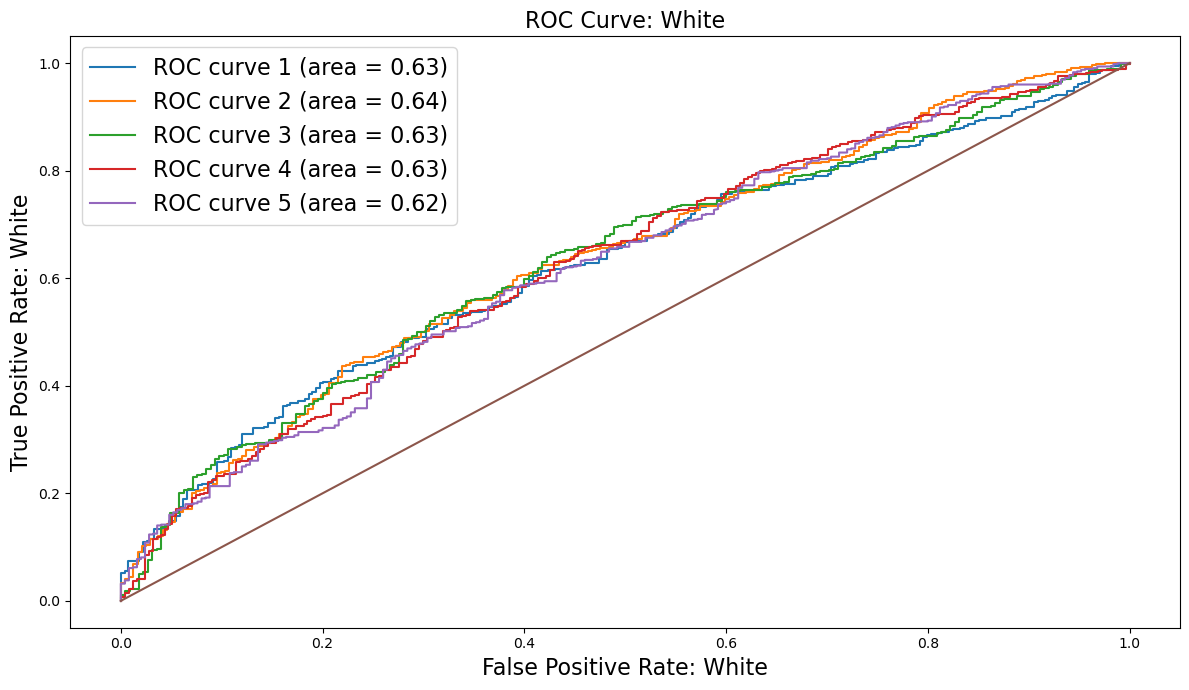

In [45]:
def test_train_white(chess_df, path1='../images/roc_curve_white.png', path2='../images/stats_model_white.png'):
    chess_df = chess_df.copy()
    chess_df['Rating Differential White'] = (
        chess_df['white_rating'] - chess_df['black_rating']).astype(int)
    white_greater_100 = chess_df[(chess_df['Rating Differential White'] > 100)]

    def victory_status(s):
        if s == 'black' or s == 'draw':
            return 0

        else:
            return 1

    white_greater_100['winner'] = white_greater_100['winner'].apply(
        victory_status).astype(int)

    X = white_greater_100[['turns', 'opening_ply',
                           'Rating Differential White']].astype(int)
    y = white_greater_100['winner']

    random_seed = 8

    def cross_val_linear(X, y, k):

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=random_seed, stratify=y)

        log_reg = sm.Logit(y_train, X_train).fit()

        print(log_reg.summary())

        plt.rc('figure', figsize=(12, 7))

        plt.text(0.01, 0.05, str(log_reg.summary()), {'fontsize': 10}, fontproperties = 'monospace') 
        plt.title('Logistic Regression Stats Model: White')
        plt.axis('off')
        plt.tight_layout()
        plt.savefig(path2)
        plt.clf()

        kf = KFold(k)

        kf.get_n_splits(X_train)

        accuracy_list = []
        precision_list = []
        recall_list = []
        f1_score_list = []
        log_loss_list = []
    
        for i, (train_index, test_index) in enumerate(kf.split(X_train)):
        
            X_train_kfold = X_train.iloc[train_index]
            y_train_kfold = y_train.iloc[train_index]
            X_test_kfold = X_train.iloc[test_index]
            y_test_kfold = y_train.iloc[test_index]

            log_model = LogisticRegression(random_state=random_seed).fit(X_train_kfold, y_train_kfold)
            y_pred = log_model.predict(X_test_kfold)
            y_prob = log_model.predict_proba(X_test_kfold)
            y_hat = log_model.decision_function(X_test_kfold)

            fpr, tpr, thresholds = metrics.roc_curve(y_test_kfold, y_hat)
            roc_auc = metrics.auc(fpr, tpr)
            plt.plot(fpr, tpr, label='ROC curve ' + f'{i+1}' + ' (area = %0.2f)' % roc_auc)
        
            accuracy_list.append(metrics.accuracy_score(y_test_kfold, y_pred))
            precision_list.append(metrics.precision_score(y_test_kfold, y_pred))
            recall_list.append(metrics.recall_score(y_test_kfold,y_pred))
            f1_score_list.append(f1_score(y_test_kfold, y_pred, average='binary', zero_division='warn'))
            log_loss_list.append(log_loss(y_test_kfold, y_prob, normalize = True))
            log_loss_prob = (-1*np.log(log_loss_list))

        white_stats = [['White Average Accuracy', 'White Average Precision', 'White Average Recall', 'White Average F1 Score', 'White Average Log Loss', 'White Average Log Loss Probability'], [np.mean(accuracy_list), np.mean(precision_list), np.mean(recall_list), np.mean(f1_score_list), np.mean(log_loss_list), np.mean(log_loss_prob)]]
        white_stats_table = ((tabulate(white_stats, headers='firstrow', tablefmt='grid')))
        textFilePath = "../images/white_stats_table.txt"
        with open(textFilePath, 'w') as f:
            f.write(white_stats_table)

        
        plt.plot([0,1], [0,1])
        plt.legend(fontsize = 16)
        plt.title('ROC Curve: White', fontsize = 16)
        plt.xlabel('False Positive Rate: White', fontsize = 16)
        plt.ylabel('True Positive Rate: White', fontsize = 16)
        plt.tight_layout()
        plt.savefig(path1)
        return print({'Mean Accuracy List [White]': np.mean(accuracy_list), 'Mean Precision List [White]': np.mean(precision_list), 'Mean Recall List [White]': np.mean(recall_list), 'Mean F1 Score [White]': np.mean(f1_score_list), 'Mean Log Loss [White]': np.mean(log_loss_list), 'Mean Log Loss Probability [White]': np.mean(log_loss_prob)})
        


    cross_val_linear(X, y, 5)
test_train_white(chess_games)

C:\Users\muscl\AppData\Local\Temp\ipykernel_32420\3954735724.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  black_greater_100['winner'] = black_greater_100['winner'].apply(victory_status).astype(int)


Optimization terminated successfully.
         Current function value: 0.598554
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 winner   No. Observations:                 4184
Model:                          Logit   Df Residuals:                     4181
Method:                           MLE   Df Model:                            2
Date:                Thu, 09 Feb 2023   Pseudo R-squ.:                 0.02985
Time:                        06:47:29   Log-Likelihood:                -2504.3
converged:                       True   LL-Null:                       -2581.4
Covariance Type:            nonrobust   LLR p-value:                 3.391e-34
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
turns                        -0.0010      0.001     -1.212      0.225      -0.

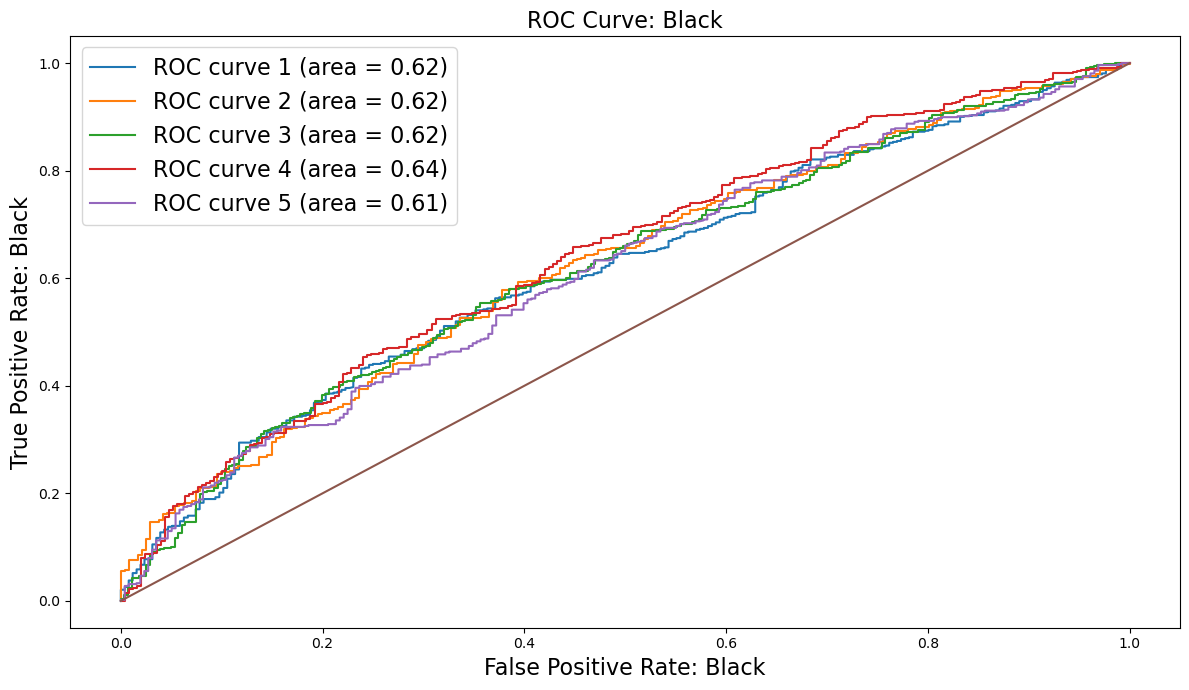

In [46]:
def test_train_black(chess_df, path1='../images/roc_curve_black.png', path2='../images/stats_model_black.png'):
    chess_df = chess_df.copy()
    chess_df['Rating Differential Black'] = (chess_df['black_rating'] - chess_df['white_rating']).astype(int)
    black_greater_100 = chess_df[(chess_df['Rating Differential Black'] > 100)]

    def victory_status(s):
        if s == 'white' or s == 'draw' :
            return 0

        else:
            return 1
    
    black_greater_100['winner'] = black_greater_100['winner'].apply(victory_status).astype(int)


    X = black_greater_100[['turns', 'opening_ply', 'Rating Differential Black']].astype(int)
    y = black_greater_100['winner']

    random_seed = 8
   
    
    def cross_val_linear(X, y, k):    
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed, stratify=y)

        log_reg = sm.Logit(y_train, X_train).fit()

        print(log_reg.summary())

        plt.rc('figure', figsize=(12, 7))

        plt.text(0.01, 0.05, str(log_reg.summary()), {'fontsize': 10}, fontproperties = 'monospace') 
        plt.title('Logistic Regression Stats Model: Black')
        plt.axis('off')
        plt.tight_layout()
        plt.savefig(path2)
        plt.clf()
    
        kf = KFold(k)
    
        kf.get_n_splits(X_train)

        accuracy_list = []
        precision_list = []
        recall_list = []
        f1_score_list = []
        log_loss_list = []
    
        for i, (train_index, test_index) in enumerate(kf.split(X_train)):
        
            X_train_kfold = X_train.iloc[train_index]
            y_train_kfold = y_train.iloc[train_index]
            X_test_kfold = X_train.iloc[test_index]
            y_test_kfold = y_train.iloc[test_index]

            log_model = LogisticRegression(random_state=random_seed).fit(X_train_kfold, y_train_kfold)
            y_pred = log_model.predict(X_test_kfold)
            y_prob = log_model.predict_proba(X_test_kfold)
            y_hat = log_model.decision_function(X_test_kfold)

            fpr, tpr, thresholds = metrics.roc_curve(y_test_kfold, y_hat)
            roc_auc = metrics.auc(fpr, tpr)
            plt.plot(fpr, tpr, label='ROC curve ' + f'{i+1}' + ' (area = %0.2f)' % roc_auc)
        
            accuracy_list.append(metrics.accuracy_score(y_test_kfold, y_pred))
            precision_list.append(metrics.precision_score(y_test_kfold, y_pred))
            recall_list.append(metrics.recall_score(y_test_kfold,y_pred))
            f1_score_list.append(f1_score(y_test_kfold, y_pred, average='binary', zero_division='warn'))
            log_loss_list.append(log_loss(y_test_kfold, y_prob, normalize = True))
            log_loss_prob = (-1*np.log(log_loss_list))

        black_stats = [['Black Average Accuracy', 'Black Average Precision', 'Black Average Recall', 'Black Average F1 Score', 'Black Average Log Loss', 'Black Average Log Loss Probability'], [np.mean(accuracy_list), np.mean(precision_list), np.mean(recall_list), np.mean(f1_score_list), np.mean(log_loss_list), np.mean(log_loss_prob)]]
        black_stats_table = ((tabulate(black_stats, headers='firstrow', tablefmt='grid')))
        textFilePath = "../images/black_stats_table.txt"
        with open(textFilePath, 'w') as f:
            f.write(black_stats_table)

        plt.plot([0,1], [0,1])
        plt.legend(fontsize = 16)
        plt.title('ROC Curve: Black', fontsize = 16)
        plt.xlabel('False Positive Rate: Black', fontsize = 16)
        plt.ylabel('True Positive Rate: Black', fontsize = 16)
        plt.tight_layout()
        plt.savefig(path1)
        return print({'Mean Accuracy List [Black]': np.mean(accuracy_list), 'Mean Precision List [Black]': np.mean(precision_list), 'Mean Recall List [Black]': np.mean(recall_list), 'Mean F1 Score [Black]': np.mean(f1_score_list), 'Mean Log Loss [Black]': np.mean(log_loss_list), 'Mean Log Loss Probability [Black]': np.mean(log_loss_prob)})
        


    cross_val_linear(X, y, 5)
test_train_black(chess_games)